# Солверы HLL и HLLC

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot 
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Метод приближенного решения задачи Римана, предложенный Хартеном, Лаксом и ван Лиром (HLL) в 1983 году, состоит в следующем:
- рассматривается двухволновое приближение (без контактного разрыва), волна разрежения представлена скачком;
- выражение для потока выписывается на основании интегральных соотношений для конечного объема (то есть получившаяся *приближенная задача* затем решается *точно*);
- для оценки скорости распространения ударных волн могут использоваться различные подходы, основанные на свойствах точного решения задачи Римана

В схеме HLLC (C – Contact), предложенной Торо с коллегами, рассмативается трехволновое приближение с учетом контактного разрыва.

## Интегральные соотношения для контрольного объема

На рисунке ниже представлена структура волн для точного решения задачи Римана в контрольном объеме $[x_L, x_R] \times [0,T]$, таком что 

$$
x_L \le TS_L, x_R \ge TS_R,
$$

где $S_L$ и $S_R$ максимальные сконорсти распространения возмущений из точки разрыва начальных условий, $T$ – отрезок времени. Для рассмартиваемого контрольного объема можно записать закон сохраненя 

$$
\int_{x_L}^{x_R} \mathbf{U}(x,T)dx = \int_{x_L}^{x_R} \mathbf{U}(x,0)dx + \int_{0}^{T}\mathbf{F}( \mathbf{U}(x_L,t))dt -\int_{0}^{T}\mathbf{F}( \mathbf{U}(x_R,t))dt
$$

![Контрольный объем](./figures/star_reg_control_volume.png)

Учитывая, что 

$$
\mathbf{U}(x,0) = \mathbf{U}^{(0)}(x) = 
\left \{ 
\begin{array}{c}
\mathbf{U}_L ~\textrm{если} ~x<0, \\
\mathbf{U}_R ~\textrm{если} ~x>0.
\end{array}
\right .,
$$

правую часть интегрального соотношения можно переписать в виде

$$
\int_{x_L}^{x_R} \mathbf{U}(x,T)dx  = x_R \mathbf{U}_R -x_L \mathbf{U}_L + T(\mathbf{F}_L - \mathbf{F}_R), 
$$

где $\mathbf{F}_L = \mathbf{F}(\mathbf{U}_L) $ и $\mathbf{F}_R = \mathbf{F}(\mathbf{U}_R) $. Полученное соотношение будем называть *уравнением согласования*. 

Разделим левую часть интегрального соотношения на три слащаемых 

$$
\int_{x_L}^{x_R} \mathbf{U}(x,T)dx = \int_{x_L}^{TS_L} \mathbf{U}(x,T)dx +  \int_{TS_L}^{TS_R} \mathbf{U}(x,T)dx + \int_{TS_R}^{x_R} \mathbf{U}(x,T)dx \
= \int_{TS_L}^{TS_R} \mathbf{U}(x,T)dx + (TS_L - x_L)\mathbf{U}_L + (x_R - TS_R)\mathbf{U}_R
$$

Объединим полученное соотношение с предыдущим, получим

$$
\int_{TS_L}^{TS_R}\mathbf{U}(x,T)dx = T(S_R\mathbf{U}_R - S_L\mathbf{U}_L + \mathbf{F}_L - \mathbf{F}_R).
$$

Из полученного выражения можно выписать *точное* решение для интегрального среднего между самой медленной и самой быстрой волнами в момент времени $T$:

$$
\frac{1}{T(S_R-S_L)}\int_{TS_L}^{TS_R}\mathbf{U}(x,T)dx  = \frac{S_R\mathbf{U}_R - S_L\mathbf{U}_L + \mathbf{F}_L - \mathbf{F}_R}{S_R-S_L}
$$


Теперь, запишем интегральный закон сохранения для отрезка $[x_L, 0] \times [0,T]$:

$$
\mathbf{F}_{0L} = \mathbf{F}_{L} - S_L\mathbf{U}_L - \frac{1}{T}\int_{TS_L}^0\mathbf{U}(x,T)dx.
$$

Аналогично для $[ 0, x_R] \times [0,T]$ можно записать

$$
\mathbf{F}_{0R} = \mathbf{F}_{R} - S_R\mathbf{U}_R + \frac{1}{T}\int_0^{TS_R}\mathbf{U}(x,T)dx.
$$

Если подставить выражения для потоков и интегральное среднее, выведенное выше, в уравнение согласования, то получим

$$
\mathbf{F}_{0L} = \mathbf{F}_{0R},
$$

что само по себе хорошо.

## Вывод потока на грани для HLL

В методе HLL стуктура волн упрощается, их остается всего две, распространяющиеся с максимальными скоростями — то есть от веера волн разрежения остается только "голова", контактный разрыв не учитывается. Получается такая картинка:

![Шаблон HLL](./figures/hll.png)

"Звездная" область ограничена двумя волнами $S_L$ и $S_R$, а решение между ними определяется по формуле для интегрального среднего, выведенной выше, то есть

$$
\mathbf{U}^{HLL}= \frac{S_R\mathbf{U}_R - S_L\mathbf{U}_L + \mathbf{F}_L - \mathbf{F}_R}{S_R-S_L}
$$

а поток $\mathbf{F}^{HLL}$ определяется по соотношениям также выведенным выше, с учетом того что подынтегральное выражение $\mathbf{U}(x,T) = \mathbf{U}^{HLL}$:

$$
\mathbf{F}^{HLL} = \mathbf{F}_{L} + S_L (\mathbf{U}^{HLL} - \mathbf{U}_L),
$$
или 
$$
\mathbf{F}^{HLL} = \mathbf{F}_{R} + S_R (\mathbf{U}^{HLL} - \mathbf{U}_R).
$$

Нужно отметить, что такие же соотношения получаются, если применить условие Рэнкина-Гюгонио к левой и правой волнам. Подставляя сюда $\mathbf{U}^{HLL}$, получим окончательно 

$$
\mathbf{F}^{HLL} = \frac{S_R\mathbf{F}_L-S_L\mathbf{F}_R + S_R S_L(\mathbf{U}_R-\mathbf{U}_R)}{S_R-S_L}
$$

### Схема HLLC для уравнений Эйлера

In [2]:
gamma = 1.4     #Гамма, она же каппа
#Различные формулы из гаммы
g_m_1_over_2g = (gamma-1)/2/gamma      #g1
g_p_1_over_2g = (gamma+1)/2/gamma      #g2
g_m_1_over_2g_inv = 1/g_m_1_over_2g    #g3
g_m_1_over_2_inv = 2/(gamma-1)         #g4
g_p_1_over_2_inv = 2/(gamma+1)         #g5
g_m_1_over_g_p_1 = (gamma-1)/(gamma+1) #g6
g_m_1_over_2 = (gamma-1)/2             #g7
g_m_1 = gamma-1  

tol = 1e-8

In [3]:
def sound_speed(d,p):
    return (gamma*(p/d))**0.5

In [4]:
def sound_speed_w(W):
    d = W[0]
    p = W[2]
    return sound_speed(d,p) 

In [5]:
def guess_p(W_l,W_r,label):
    c_l = sound_speed(W_l[0],W_l[2])
    c_r = sound_speed(W_r[0],W_r[2])

    
    W_aver = 0.5*(W_l+W_r)
    p_pv = W_aver[2] - 0.5*(W_r[1]-W_l[1])*W_aver[0]*0.5*(c_l+c_r)
    p_0 = max(tol,p_pv)
    
    if label == 'TR':
        return ((c_l + c_r - 0.5*g_m_1*(W_r[1] - W_l[1]))/
                ((c_l/W_l[2]**g_m_1_over_2g) + (c_r/W_r[2]**g_m_1_over_2g) ))**g_m_1_over_2g_inv
    
    elif label == 'PV':

        return p_0
    
    elif label == 'TS':
        A_k = lambda x : g_p_1_over_2_inv/x
        B_k = lambda x : g_m_1_over_g_p_1*x
        p_ts = ((A_k(W_l[0])/(p_pv + B_k(W_l[2])))**0.5*W_l[2] + (A_k(W_r[0])/(p_pv + B_k(W_r[2])))**0.5*W_r[2] \
                - (W_r[1]-W_l[1])) /\
        ((A_k(W_l[0])/(p_pv + B_k(W_l[2])))**0.5 + (A_k(W_r[0])/(p_pv + B_k(W_r[2])))**0.5)  
        return max(tol,p_ts)
    else:
        return W_aver[2]
        
        

In [6]:
def init(case):
    if case == 'sod':
        W_l = np.array([1, 0.75, 1])
        W_r = np.array([0.125, 0, 0.1])
        t = 0.25
    elif case == '123':
        W_l = np.array([1, -2, 0.4])
        W_r = np.array([1, 2, 0.4])
        t = 0.15
    elif case == 'left-woodward':
        W_l = np.array([1, 0, 1000])
        W_r = np.array([1, 0, 0.1])
        
        t = 0.012
    else : print('Unknown case!')
    return W_l, W_r, t

In [7]:
W_l,W_r,_ = init('sod')

In [8]:
def U_to_W(U):
    W = np.zeros_like(U)
    W[0] = U[0]
    W[1] = U[1]/U[0]
    W[2] = g_m_1*(U[2] - 0.5*U[1]**2/U[0])
    return W

In [9]:
def W_to_U(W):
    U = np.zeros_like(W)
    U[0] = W[0]
    U[1] = W[1]*W[0]
    U[2] = 0.5*W[1]**2*W[0]+W[2]/ g_m_1
    return U


In [10]:
def flux(W):
    F = np.zeros_like(W)
    F[0] = W[1]*W[0]
    F[1] = W[1]**2*W[0] + W[2]
    F[2] = W[1]*(0.5*W[1]**2*W[0]+W[2]/ g_m_1 + W[2])
    return F

In [11]:
def q(p,p_star):
    if p_star > p:
        return (1 + g_p_1_over_2g*(p_star/p - 1))**0.5
    else :
        return 1

In [93]:
def get_speeds_hllc(W_l,W_r,p_star):
    S_l = W_l[1] - sound_speed_w(W_l)*q(W_l[2],p_star)
    S_r = W_r[1] + sound_speed_w(W_r)*q(W_r[2],p_star)
    
    S_star = (W_r[2] - W_l[2] + \
              W_l[0]*W_l[1]*(S_l - W_l[1]) - \
              W_r[0]*W_r[1]*(S_r - W_r[1]))/( W_l[0]*(S_l - W_l[1]) - \
              W_r[0]*(S_r - W_r[1]) )
    return np.asarray((S_l,S_r,S_star))

In [169]:
def get_speeds(W_l,W_r,p_star):
    S_star = max(np.abs(W_l[1])+sound_speed_w(W_l), np.abs(W_r[1])+sound_speed_w(W_r))
    
    S_l = -S_star 
    S_r = S_star
    return np.asarray((S_l,S_r,S_star))

In [170]:
def F_HLLC(W,S_star,S):
    D = np.asarray([0,1,S_star])
    F_star = (S_star*(S*W_to_U(W) - flux(W)) + \
              S*(W[2] + W[0]*(S - W[1])*(S_star - W[1]))*D)/\
    (S - S_star)
    return F_star

In [171]:
def F_HLL(W_l, W_r,S_l, S_r):
    F = (S_r*flux(W_l) - S_l*flux(W_r) + S_l*S_r*(W_to_U(W_r) - W_to_U(W_l)))/(S_r-S_l)
    
    return F

In [181]:
def F_RUS(W_l, W_r, S_star):
    F_star = (flux(W_l)+flux(W_r))/2 - S_star*(W_to_U(W_r) - W_to_U(W_l))/2
    
    return F_star

In [182]:
def hllc_flux(W_l,W_r):
    p_star = guess_p(W_l,W_r,'TR')
    S_l,S_r,S_star = get_speeds_hllc(W_l,W_r,p_star)
    if 0 <= S_l:
        return flux(W_l)
    if S_l <= 0 <= S_star:
        return F_HLLC(W_l,S_star,S_l)
    if S_star <= 0 <= S_r:
        return F_HLLC(W_r,S_star,S_r)
    if 0 >= S_r:
        return flux(W_r)

In [183]:
def rus_flux(W_l,W_r):
    p_star = guess_p(W_l,W_r,'TR')
    S_l,S_r,S_star = get_speeds(W_l,W_r,p_star)
    if 0 <= S_l:
        return flux(W_l)
    if S_l <= 0 <= S_r:
        return F_RUS(W_l, W_r,S_star)
    if 0 >= S_r:
        return flux(W_r)

In [184]:
def hll_flux(W_l,W_r):
    p_star = guess_p(W_l,W_r,'TR')
    S_l,S_r,_ = get_speeds_hllc(W_l,W_r,p_star)
    if 0 <= S_l:
        return flux(W_l)
    if S_l <= 0 <= S_r:
        return F_HLL(W_l, W_r,S_l, S_r)
    if 0 >= S_r:
        return flux(W_r)

In [185]:
N_points = 401
x = np.linspace(0,1,N_points)
decay_pos = 0.3
W_correct= np.zeros((N_points,3))

In [186]:
W_l,W_r,t = init('sod')

In [187]:
#rusanov
dx = 1./(N_points - 1)
sigma = 1

Wr = np.zeros((N_points,3))
Wr[np.where(x<decay_pos),:] = W_l
Wr[np.where(x>=decay_pos),:] = W_r

Ur = np.zeros_like(Wr) 

In [188]:
t_ = 0
U_n = np.copy(Ur)
while t_<t:
    Ur = W_to_U(Wr.T).T
    rus_fluxes = np.zeros((N_points - 1,3))
    speeds = np.zeros(N_points - 1)
    for i,x_ in enumerate(x[:-1]):
        
        rus_fluxes[i] =rus_flux(Wr[i],Wr[i+1])
        c_l = sound_speed(Wr[i][0],Wr[i][2])
        c_r = sound_speed(Wr[i+1][0],Wr[i+1][2])
        speeds[i] = max(abs(Wr[i][1])+c_l,abs(Wr[i+1][1])+  c_r)

    
    dt = sigma*dx/max(speeds)
    U_n[1:-1,:] = Ur[1:-1,:] + dt/dx*(rus_fluxes[:-1,:]-rus_fluxes[1:,:]) 
    U_n[0,:] = U_n[1,:]
    U_n[-1,:] = U_n[-2,:]
    Wr = U_to_W(U_n.T).T
    t_=t_+dt

In [189]:
#hll
Wh = np.zeros((N_points,3))
Wh[np.where(x<decay_pos),:] = W_l
Wh[np.where(x>=decay_pos),:] = W_r

Uh = np.zeros_like(Wh) 

In [190]:
t_ = 0
U_n = np.copy(Uh)
while t_<t:
    Uh = W_to_U(Wh.T).T
    hll_fluxes = np.zeros((N_points - 1,3))
    speeds = np.zeros(N_points - 1)
    for i,x_ in enumerate(x[:-1]):
        
        hll_fluxes[i] =hll_flux(Wh[i],Wh[i+1])
        c_l = sound_speed(Wh[i][0],Wh[i][2])
        c_r = sound_speed(Wh[i+1][0],Wh[i+1][2])
        speeds[i] = max(abs(Wh[i][1])+c_l,abs(Wh[i+1][1])+  c_r)

    
    dt = sigma*dx/max(speeds)
    U_n[1:-1,:] = Uh[1:-1,:] + dt/dx*(hll_fluxes[:-1,:]-hll_fluxes[1:,:]) 
    U_n[0,:] = U_n[1,:]
    U_n[-1,:] = U_n[-2,:]
    Wh = U_to_W(U_n.T).T
    t_=t_+dt

In [191]:
#hllc
Wc = np.zeros((N_points,3))
Wc[np.where(x<decay_pos),:] = W_l
Wc[np.where(x>=decay_pos),:] = W_r

Uc = np.zeros_like(Wc) 

In [192]:
t_ = 0
#dt = 0.0002
U_n = np.copy(Uc)
while t_<t:
    Uc = W_to_U(Wc.T).T
    hllc_fluxes = np.zeros((N_points - 1,3))
    speeds = np.zeros(N_points - 1)
    for i,x_ in enumerate(x[:-1]):
        
        hllc_fluxes[i] =hllc_flux(Wc[i],Wc[i+1])
        c_l = sound_speed(Wc[i][0],Wc[i][2])
        c_r = sound_speed(Wc[i+1][0],Wc[i+1][2])
        speeds[i] = max(abs(Wc[i][1])+c_l,abs(Wc[i+1][1])+  c_r)

    
    dt = sigma*dx/max(speeds)
    U_n[1:-1,:] = Uc[1:-1,:] + dt/dx*(hllc_fluxes[:-1,:]-hllc_fluxes[1:,:]) 
    U_n[0,:] = U_n[1,:]
    U_n[-1,:] = U_n[-2,:]
    Wc = U_to_W(U_n.T).T
    t_=t_+dt

In [193]:
%store -r

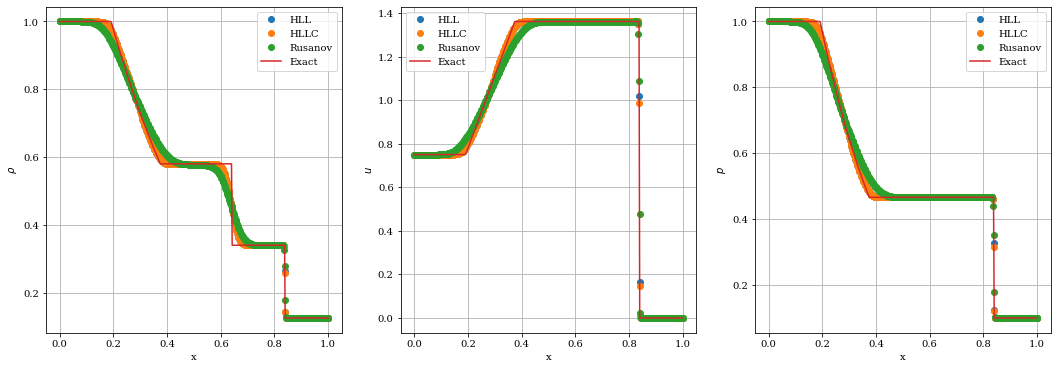

In [194]:
fig,axs = pyplot.subplots(1,3,figsize=(18,6)
                         )
for ax, Wh_,Wr_, Wc_, W_c, y_label in zip(axs, Wh.T, Wr.T, Wc.T, W_correct.T, (r'$\rho$',r'$u$',r'$p$') ):
    ax.plot(x,Wh_,'o',label='HLL')
    ax.plot(x,Wc_,'o',label='HLLC')
    ax.plot(x,Wr_,'o',label='Rusanov')
    ax.plot(x,W_c,label='Exact')
    ax.set_ylabel(y_label)
    ax.set_xlabel('x')
    scale_y = 1.1*abs(max(W_c)-min(W_c))
    ax.set_ylim(0.5*(max(W_c)+min(W_c) - scale_y), 0.5*(max(W_c)+min(W_c) + scale_y))
    ax.legend(loc='best')
    ax.grid()